**MACHINE LEARNING PROJECT**

AUTHOR : OKWUAZU IFEAKACHUKWU 

PROJECT : IMPLEMENTING THREE CLASSIFICATION MODELS TO PREDICT THE REVENUE OF AN ONLINE STORE 

In [1]:
#importing libraries 
import os
import warnings
import numpy as np
%matplotlib inline
import pandas as pd 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt  
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,RobustScaler

**DATA EXPLORATION**

In [16]:
#loading the raw data 
data=pd.read_csv('/content/Coursework_1_data.csv')

#display first five rows of data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break
print(data.shape)                 #display dimension of the data set 
print('...........................................................')
print(data.info())                # display column type 
print('...........................................................')
print(data.describe())            #Quick statistical summary of the dataframe 
print('...........................................................')
print(data.isnull().count())      #check for null values
print('...........................................................')
print(data.nunique())              #check for the number of unique elements in each column  

(12330, 18)
...........................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Regi

**DATA PRE-PROCESING**

In [18]:
#Display the number of duplicate rows in the data 
data.duplicated().sum()
data.loc[data.duplicated(keep='first'),:]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [19]:
#drop duplicate values 
data.drop_duplicates(subset=None, keep='first', inplace=True)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


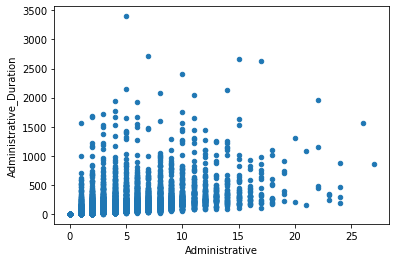

In [20]:
#scatter plots of bivarite numerical variables 
ax=data.plot.scatter(x='Administrative', y='Administrative_Duration')

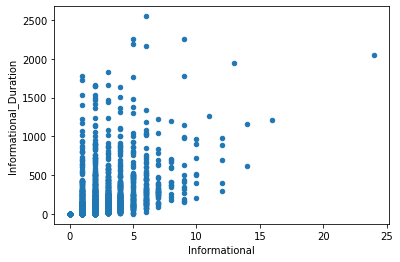

In [21]:
#scatter plots of bivarite numerical variables 
ax=data.plot.scatter(x='Informational', y='Informational_Duration')

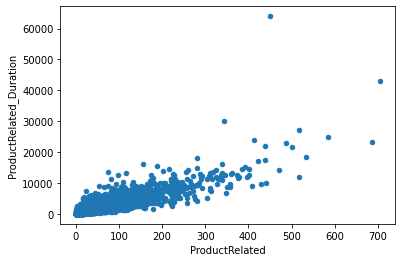

In [22]:
#scatter plots of bivarite numerical variables 
ax=data.plot.scatter(x='ProductRelated',y='ProductRelated_Duration')

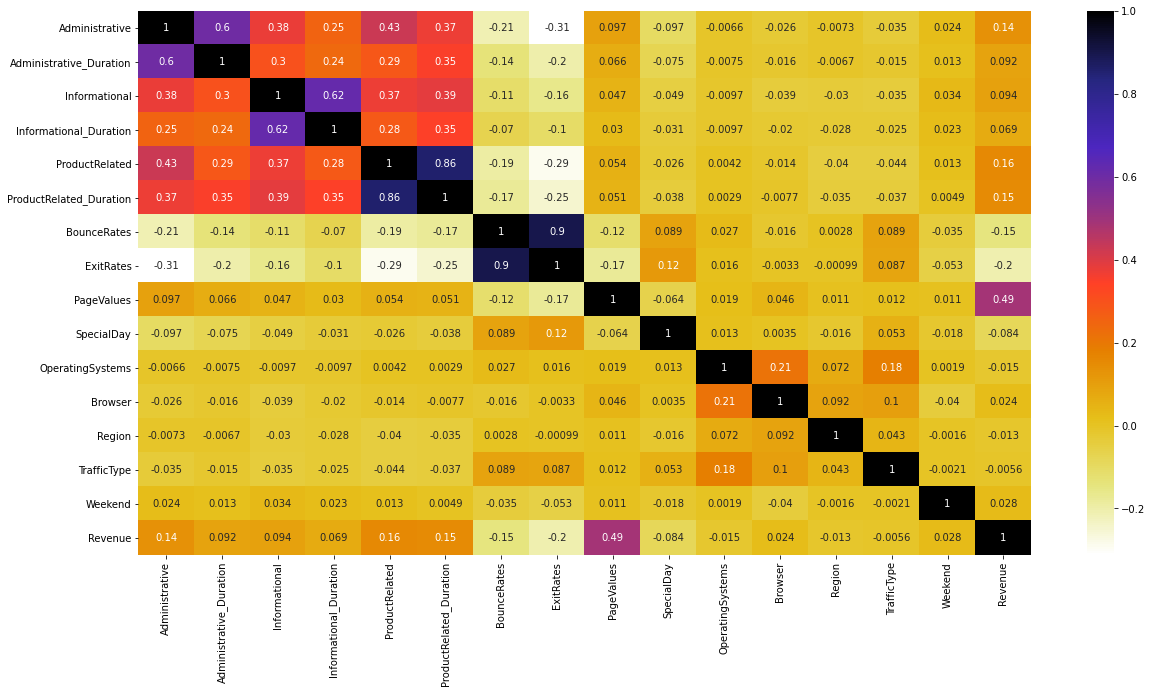

In [23]:
#using pearson corellation between numerical variables 
import seaborn as sns 
plt.figure(figsize=(20,10))
cor=data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
#drop strongly corellated features based on heat map 
data=data.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','ExitRates'],axis=1,)
data

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,1,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,2,0.000000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,1,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0,2,0.050000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0,10,0.020000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0,5,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0,6,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,0,15,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [25]:
#Extracting independent variables
X=data.loc[:, data.columns != 'Revenue']
features=['Weekend','VisitorType','Month']  
X=pd.get_dummies(X,columns=features,drop_first=True)
X

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend_True,VisitorType_Other,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,1,0.200000,0.000000,0.0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,2,0.000000,0.000000,0.0,2,2,1,2,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,1,0.200000,0.000000,0.0,4,1,9,3,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,2,0.050000,0.000000,0.0,3,2,2,4,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,10,0.020000,0.000000,0.0,3,3,1,4,1,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.007143,12.241717,0.0,4,6,1,1,1,0,1,1,0,0,0,0,0,0,0,0
12326,0,0,5,0.000000,0.000000,0.0,3,2,1,8,1,0,1,0,0,0,0,0,0,1,0,0
12327,0,0,6,0.083333,0.000000,0.0,3,2,1,13,1,0,1,0,0,0,0,0,0,1,0,0
12328,4,0,15,0.000000,0.000000,0.0,2,2,3,11,0,0,1,0,0,0,0,0,0,1,0,0


In [26]:
#dependent variables/class label/target
y= data[['Revenue']]
#encoding target column using labelencoding 
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y.loc[:,['Revenue']]=\
y.loc[:,['Revenue']].apply(enc.fit_transform)
y.head()
y

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


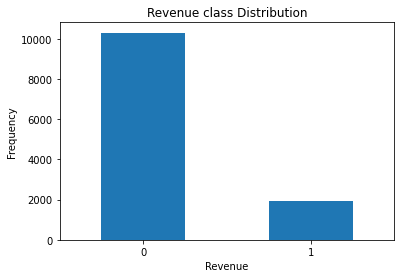

In [27]:
#plot of histogram to reveal imbalance in target class
count_revenue=pd.value_counts(y['Revenue'], sort = True)
count_revenue.plot(kind= 'bar', rot=0)
plt.title('Revenue class Distribution')
plt.xticks(range(2), )
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [28]:
y.value_counts()

Revenue
0          10297
1           1908
dtype: int64

**LOGISTIC REGRESSION MODEL IMPLEMENTATION**

In [29]:
#oversampling 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter 
os=RandomOverSampler(1.0)
X2, y2=os.fit_sample(X,y)
print("The number of classes after fit {}".format(Counter(y2)))

The number of classes after fit Counter({0: 10297, 1: 10297})


In [30]:
#splitting dataset to test and train subsets 
X_train_ns,X_test_ns,y_train_ns,y_test_ns=train_test_split(X2,y2,test_size=0.3, random_state=1)

In [31]:
#Fitting the model 
log=LogisticRegression( )
log.fit(X_train_ns,y_train_ns)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**MODEL EVALUATION**

In [32]:
#Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred_ns=log.predict(X_test_ns)
print(confusion_matrix(y_test_ns,ypred_ns))
print(accuracy_score(y_test_ns,ypred_ns))
print(classification_report(y_test_ns,ypred_ns))

[[2740  369]
 [ 784 2286]]
0.8134002265738792
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      3109
           1       0.86      0.74      0.80      3070

    accuracy                           0.81      6179
   macro avg       0.82      0.81      0.81      6179
weighted avg       0.82      0.81      0.81      6179



**HYPERPARAMETER OPTIMIZATION USING GRIDSEARCHCV**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [34]:
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5, shuffle=False,random_state=None)

In [35]:
clf=GridSearchCV(log,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_ns, y_train_ns)



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [36]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [37]:
#Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred_ns=clf.predict(X_test_ns)
print(confusion_matrix(y_test_ns,ypred_ns))
print(accuracy_score(y_test_ns,ypred_ns))
print(classification_report(y_test_ns,ypred_ns))

[[2767  342]
 [ 817 2253]]
0.8124291956627286
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      3109
           1       0.87      0.73      0.80      3070

    accuracy                           0.81      6179
   macro avg       0.82      0.81      0.81      6179
weighted avg       0.82      0.81      0.81      6179



**K NEAREST NEIGHBOUR MODEL IMPLEMENTATION**

In [38]:
#Fitting the model 
myClassifier=KNeighborsClassifier()
myClassifier.fit(X_train_ns,y_train_ns)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
myClassifier.fit(X_train_ns, y_train_ns)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
#Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred_ns=myClassifier.predict(X_test_ns)
print(confusion_matrix(y_test_ns,ypred_ns))
print(accuracy_score(y_test_ns,ypred_ns))
print(classification_report(y_test_ns,ypred_ns))

[[2518  591]
 [ 173 2897]]
0.8763553973134811
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3109
           1       0.83      0.94      0.88      3070

    accuracy                           0.88      6179
   macro avg       0.88      0.88      0.88      6179
weighted avg       0.88      0.88      0.88      6179



**HYPERPARAMETER OPTIMIZATION**


In [41]:
from sklearn.model_selection import GridSearchCV
leaf_size=list(range(1,50))
n_neighbors =list(range(1,30))
p=[1,2]

hyperparameters=dict(leaf_size=leaf_size, n_neighbors=n_neighbors,p=p)
Knn=KNeighborsClassifier()
clf=GridSearchCV(Knn,hyperparameters,cv=10)
best_model=clf.fit(X_train_ns,y_train_ns)


In [42]:
  #Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred_ns=clf.predict(X_test_ns)
print(confusion_matrix(y_test_ns,ypred_ns))
print(accuracy_score(y_test_ns,ypred_ns))
print(classification_report(y_test_ns,ypred_ns))

[[2771  338]
 [  21 3049]]
0.9418999838161515
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3109
           1       0.90      0.99      0.94      3070

    accuracy                           0.94      6179
   macro avg       0.95      0.94      0.94      6179
weighted avg       0.95      0.94      0.94      6179



**RANDOM FOREST MODEL IMPLEMENTATION**

In [43]:
cl=RandomForestClassifier().fit(X_train_ns,y_train_ns)


In [44]:
#Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred_ns=cl.predict(X_test_ns)
print(confusion_matrix(y_test_ns,ypred_ns))
print(accuracy_score(y_test_ns,ypred_ns))
print(classification_report(y_test_ns,ypred_ns))

[[2841  268]
 [  16 3054]]
0.9540378702055349
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3109
           1       0.92      0.99      0.96      3070

    accuracy                           0.95      6179
   macro avg       0.96      0.95      0.95      6179
weighted avg       0.96      0.95      0.95      6179



**HYPERPARAMETER OPTIMIZATION/TUNING**

In [45]:
#Randomized Search Cv
from sklearn.model_selection import RandomizedSearchCV
#Number of trees 
n_estimators=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#Number of features to consider at every split instance 
max_features=['auto','sqrt','log2']
#Maximum number of levels in tree 
max_depth=[int(x) for x in np.linspace(10,1000,10)]
#Minimum number of samples required to split a node 
min_samples_split=[2,5,10,14]
#Minimum number of samples per leaf node 
min_samples_leaf=[1,2,4,6,8]
#random grid creation 
random_grid= {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [46]:
cl=RandomForestClassifier()
cl_randomcv=RandomizedSearchCV(estimator=cl,param_distributions=random_grid,n_iter=100,cv=2,verbose=2,random_state=100,n_jobs=-1)
cl_randomcv.fit(X_train_ns,y_train_ns)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 21.6min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
rf=cl_randomcv.best_estimator_

In [50]:
#Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred_ns=rf.predict(X_test_ns)
print(confusion_matrix(y_test_ns,ypred_ns))
print(accuracy_score(y_test_ns,ypred_ns))
print(classification_report(y_test_ns,ypred_ns))


[[2851  258]
 [  15 3055]]
0.9558180935426445
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3109
           1       0.92      1.00      0.96      3070

    accuracy                           0.96      6179
   macro avg       0.96      0.96      0.96      6179
weighted avg       0.96      0.96      0.96      6179



**PROJECT SUMMARY**

This report present details of the implementation of three chosen machine learning models-Logistic regression, Random forest, and K 
nearest neighbour in predicting the purchasing intention of e-commerce visitors to an online store.After implementation, the initial 
performance of each model was evaluated using certain metrics such as accuracy, precision, recall, and f1 score, after which 
some hyperparameter tunning was done to ensure optimization of each model. The results from each algorithm were compared, 
and the best model was selected based on overall performance.

**PERFORMANCE EVALUATION**

The accuracy of the model cannot be relied on in this case as the target column(revenue) is highly imbalanced. It is more suitable to evaluate the model using the f1 score which is a harmonic mean of precision and recall. 

**BEFORE HYPERPARAMETER TUNNING**

The f1 scores of the Knn, Logistic regression and random forest models were 
0.87,0.83 and 0.95 respectively in predicting the falses and 0.88,0.80 & 0.96
respectively in predicting the trues.therefore we can conclude that the random forest classifier outperforms the other models in predicting falses as well as trues in the class target.
Even after tunning hyperparameters the f1 score of the random forest classifier
remained the same. It is therefore the best model in predicting the revenue/target variable. 


